In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline


In [ ]:
'''
reading from google drive 
'''
anyoneWithLink='https://drive.google.com/file/d/1Ml7hnhafNkbXcTzbsCcic4k-eSSkXDCK/view?usp=sharing'
path='https://drive.google.com/uc?export=download&id='+anyoneWithLink.split('/')[-2]
aqiDf=pd.read_csv(path)

In [ ]:
aqiDf.shape

(29531, 16)

In [ ]:
aqiDf.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
aqiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
aqiDf.groupby('City').size()

City
Ahmedabad             2009
Aizawl                 113
Amaravati              951
Amritsar              1221
Bengaluru             2009
Bhopal                 289
Brajrajnagar           938
Chandigarh             304
Chennai               2009
Coimbatore             386
Delhi                 2009
Ernakulam              162
Gurugram              1679
Guwahati               502
Hyderabad             2006
Jaipur                1114
Jorapokhar            1169
Kochi                  162
Kolkata                814
Lucknow               2009
Mumbai                2009
Patna                 1858
Shillong               310
Talcher                925
Thiruvananthapuram    1112
Visakhapatnam         1462
dtype: int64

In [ ]:
'''
We want to estimate for country so dropping city and also AQI doesn't depend on city name
'''
aqiDf.drop(['City','Date'],axis=1,inplace=True)

In [ ]:
aqiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24933 non-null  float64
 1   PM10        18391 non-null  float64
 2   NO          25949 non-null  float64
 3   NO2         25946 non-null  float64
 4   NOx         25346 non-null  float64
 5   NH3         19203 non-null  float64
 6   CO          27472 non-null  float64
 7   SO2         25677 non-null  float64
 8   O3          25509 non-null  float64
 9   Benzene     23908 non-null  float64
 10  Toluene     21490 non-null  float64
 11  Xylene      11422 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


# Missing value checking

In [ ]:
aqiDf.isnull().sum()

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

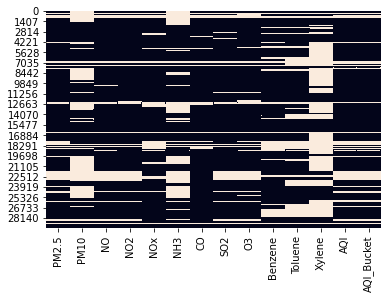

In [ ]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [ ]:
#  We will drop AQI_Bucket cause its simply the label of AQI and also they are so many null of them 

aqiDf.drop(['AQI_Bucket'],axis=1,inplace=True)

In [ ]:
#  as more than 50% of the Xylene feature is null so dropping it 

aqiDf.drop(['Xylene'],axis=1,inplace=True)

In [ ]:
# dropping unlabeled data

aqiDf.dropna(subset=['AQI'],inplace=True)

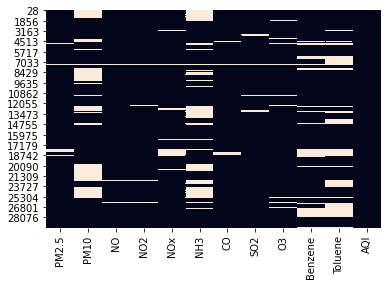

In [ ]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [ ]:
aqiDf.isnull().sum()

PM2.5       678
PM10       7086
NO          387
NO2         391
NOx        1857
NH3        6536
CO          445
SO2         605
O3          807
Benzene    3535
Toluene    5826
AQI           0
dtype: int64

In [ ]:
aqiDf.shape

(24850, 12)

Let's see if the missing featrue is important or we will drop them

# Corrrelations

In [ ]:
aqiDf.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.853200,0.459610,0.366404,0.451946,0.282001,0.093524,0.136998,0.167262,0.020743,0.119306,0.659181
PM10,0.853200,1.000000,0.530343,0.483121,0.544327,0.392048,0.116719,0.260924,0.251704,0.018284,0.168939,0.803313
NO,0.459610,0.530343,1.000000,0.488197,0.801345,0.184721,0.217054,0.189123,0.017864,0.041796,0.153376,0.452191
NO2,0.366404,0.483121,0.488197,1.000000,0.633837,0.236165,0.371186,0.425414,0.295962,0.027901,0.274811,0.537071
NOx,0.451946,0.544327,0.801345,0.633837,1.000000,0.161563,0.248999,0.259134,0.096364,0.046627,0.202927,0.486450
NH3,0.282001,0.392048,0.184721,0.236165,0.161563,1.000000,0.114204,-0.028089,0.095282,-0.015771,0.010554,0.252019
CO,0.093524,0.116719,0.217054,0.371186,0.248999,0.114204,1.000000,0.511013,0.041634,0.047629,0.273694,0.683346
SO2,0.136998,0.260924,0.189123,0.425414,0.259134,-0.028089,0.511013,1.000000,0.171489,0.039395,0.313578,0.490586
O3,0.167262,0.251704,0.017864,0.295962,0.096364,0.095282,0.041634,0.171489,1.000000,0.018140,0.128536,0.198991
Benzene,0.020743,0.018284,0.041796,0.027901,0.046627,-0.015771,0.047629,0.039395,0.018140,1.000000,0.764280,0.044407


In [ ]:
aqiDf.corr()['AQI'].sort_values(ascending=False)

AQI        1.000000
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Benzene    0.044407
Name: AQI, dtype: float64

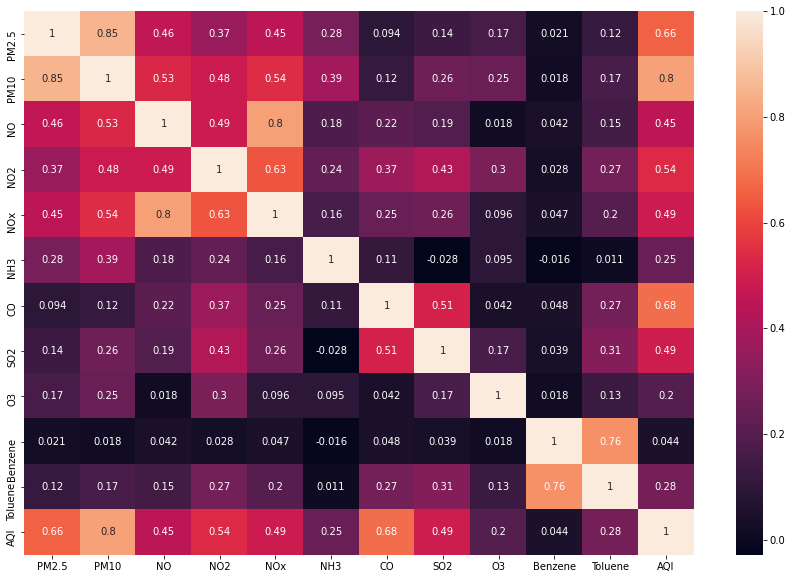

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(aqiDf.corr(),annot=True)

In [ ]:
#  as 'NH3','Benzene','Toluene','O3' are less correlated with AQI 

aqiDf.drop(['NH3','Benzene','Toluene','O3'],axis=1,inplace=True)

In [ ]:
aqiDf.isnull().sum()

PM2.5     678
PM10     7086
NO        387
NO2       391
NOx      1857
CO        445
SO2       605
AQI         0
dtype: int64

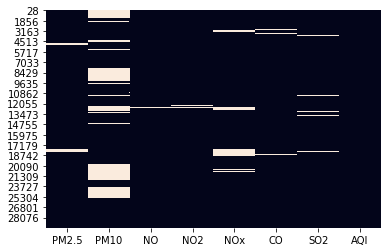

In [ ]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [ ]:
aqiDf.corr()['AQI'].sort_values(ascending=False)

AQI      1.000000
PM10     0.803313
CO       0.683346
PM2.5    0.659181
NO2      0.537071
SO2      0.490586
NOx      0.486450
NO       0.452191
Name: AQI, dtype: float64

In [ ]:
aqiDf.isnull().sum()

PM2.5     678
PM10     7086
NO        387
NO2       391
NOx      1857
CO        445
SO2       605
AQI         0
dtype: int64

In [ ]:
# AQI is highly correlated to PM10 so we predict missing values of PM10 from PM2.5
# from sklearn.linear_model import LinearRegression
# tempDf=aqiDf.copy()
# tempDf.dropna(subset=['PM2.5','PM10','NOx'],inplace=True)

# featurs=tempDf[['PM2.5','NOx']]
# target=tempDf['PM10']

# testFeatures=aqiDf.fillna(aqiDf.mean())[['PM2.5','NOx']]
# print(testFeatures)
# # ['PM2.5'].values.reshape(-1, 1)
# lrModel=LinearRegression().fit(featurs,target)
# predicted_PM10=lrModel.predict(testFeatures)
# # .values.reshape(-1, 1)
# indicies_of_missing = aqiDf[aqiDf['PM10'].isnull()].index # list of the missing indices
# cnt=0
# for fill_index, dataframe_index in enumerate(indicies_of_missing):
#   cnt+=1
#   aqiDf.loc[dataframe_index, 'PM10'] = predicted_PM10[fill_index]
# # aqiDf['PM10']=aqiDf['PM10'].fillna(predicted_PM10)
# print(cnt)

In [ ]:
aqiDf.isnull().sum()

PM2.5     678
PM10     7086
NO        387
NO2       391
NOx      1857
CO        445
SO2       605
AQI         0
dtype: int64

In [ ]:
aqiDf.shape

(24850, 8)

# VIF (Variable Inflation Factors)

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.VIF score of an independent variable represents how well the variable is explained by other independent variables.

*   VIF starts at 1 and has no upper limit
*   VIF = 1, no correlation between the independent variable and the other variables
*   VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# dropping target variable keeping only independant variable

copyDf=aqiDf.drop(['AQI'],axis=1).dropna()
copyDf = copyDf._get_numeric_data()
X = copyDf
calc_vif(X)

,variables,VIF
0,PM2.5,9.783458
1,PM10,11.404080
2,NO,4.793675
3,NO2,5.840500
4,NOx,8.072444
5,CO,1.748284
6,SO2,2.821621


In [ ]:
# dropping target variable keeping only independant variable

copyDf=aqiDf.drop(['AQI','NOx'],axis=1).dropna()
copyDf = copyDf._get_numeric_data()
X = copyDf
calc_vif(X)

,variables,VIF
0,PM2.5,8.900625
1,PM10,10.596620
2,NO,2.588801
3,NO2,4.227647
4,CO,1.727987
5,SO2,2.743472


In [ ]:
# dropping target variable keeping only independant variable

copyDf=aqiDf.drop(['AQI','PM2.5','NOx'],axis=1).dropna()
copyDf = copyDf._get_numeric_data()
X = copyDf
calc_vif(X)

,variables,VIF
0,PM10,4.080008
1,NO,2.513778
2,NO2,3.950879
3,CO,1.649211
4,SO2,2.396649


In [ ]:
#  We are not droping here because for this dataset dropping them doesn't give good result
# aqiDf.drop(['PM2.5','NOx'],axis=1,inplace=True)

# Dropping Missing Value that is not removed yet

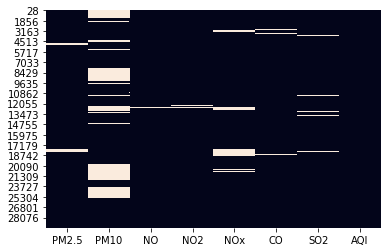

In [ ]:
sns.heatmap(aqiDf.isnull(),cbar=False)

In [ ]:
aqiDf=aqiDf.dropna()

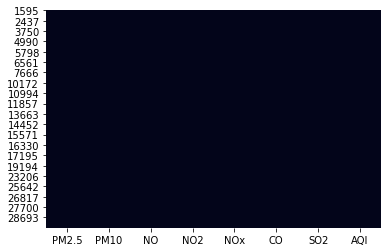

In [ ]:
sns.heatmap(aqiDf.isnull(),cbar=False)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate

X = aqiDf.drop(columns=['AQI'])
y = aqiDf['AQI']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

# Linear Multiple Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression(normalize=True).fit(X_train,y_train)
test_preds=lrModel.predict(X_test)
train_preds=lrModel.predict(X_train)

# Evaluation

Text(0, 0.5, 'Predicted values')

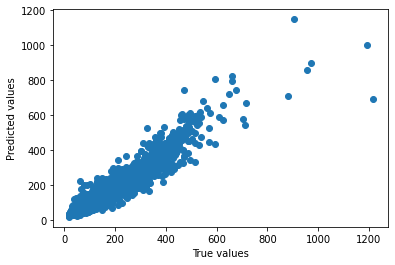

In [ ]:
plt.scatter(y_test,test_preds)
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [ ]:
'''
Train Score : 0.8948748755329653
Test Score : 0.9027785743568724
'''
from sklearn.metrics import  r2_score
print("Train Score :",r2_score(y_train,train_preds))
print("Test Score :",r2_score(y_test,test_preds))

Train Score : 0.8948748755329653
Test Score : 0.9027785743568724
